In [1]:
pip install -U notebook-as-pdf

Requirement already up-to-date: notebook-as-pdf in c:\users\jda21\anaconda3\lib\site-packages (0.4.0)
Note: you may need to restart the kernel to use updated packages.


In [8]:
pip install nbconvert


In [15]:
nbconvert --topdf ANOVA_Final.ipynb

SyntaxError: invalid syntax (<ipython-input-15-9aa7e7405002>, line 1)

## _Estadística_
### _Data Analysis: ANOVA_
-------------------

- Grupo 3:   

    &#9673; Juan David Valencia Toro ; ID.: 1040756345 [ juan.valencia35@udea.edu.co ]  
    &#9673; Juan Diego Alvarez Perdomo ; ID.: 1003814249 [ juan.alvarez67@udea.edu.co ]
    
    > &#9658;  Dataset: Students Performance in Exams.   
    * __Title__ &#10141; Exam scores for students at a public school
    * __Source__ &#10141; Royce Kimmons, PhD
    * __Abstract__ &#10141; This data set consists of the marks secured by the students in various subjects. Also includes scores from three exams and a variety of personal, social, and economic factors that have interaction effects upon them.

-
    
<img src="https://images.unsplash.com/photo-1507842217343-583bb7270b66?ixid=MXwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHw%3D&ixlib=rb-1.2.1&auto=format&fit=crop&w=1153&q=80"
     alt="Random Library Pic"
     style="float: center; margin-left: 1px;" />

In [74]:
# Load and import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols
import ipywidgets as widgets
import scipy.stats as stat
import scipy

# 1. Inicialización Base de Datos
## Análisis descriptivo del dataframe

In [172]:
#create function for summary data
df = pd.read_csv('https://raw.githubusercontent.com/jda-21/stats/main/ANOVA/StudentsPerformance.csv')    

def overview(dataframe):
    
    print("Row/Cols:\n", df.shape)
    print("\n")
    print("Tipo de variable:\n", df.dtypes)
    print("\n")
    print("Valore nulos:\n", df.isnull().sum())
    print("\n")
    print("Descripción general:\n", df.describe())
    return

df.head(10)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
5,female,group B,associate's degree,standard,none,71,83,78
6,female,group B,some college,standard,completed,88,95,92
7,male,group B,some college,free/reduced,none,40,43,39
8,male,group D,high school,free/reduced,completed,64,64,67
9,female,group B,high school,free/reduced,none,38,60,50


In [19]:
overview(df)

Row/Cols:
 (1000, 8)


Tipo de variable:
 gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object


Valore nulos:
 gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64


Descripción general:
        math score  reading score  writing score
count  1000.00000    1000.000000    1000.000000
mean     66.08900      69.169000      68.054000
std      15.16308      14.600192      15.195657
min       0.00000      17.000000      10.000000
25%      57.00000      59.000000      57.750000
50%      66.00000      70.000000  

In [21]:
df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [28]:
def dist(dataset, variable):
    g = sns.pairplot(data = dataset, hue = variable)
    g.fig.suptitle('Distribución entre puntuación y {}'.format(variable), fontsize = 20)
    g.fig.subplots_adjust(top = 0.9)
    return g

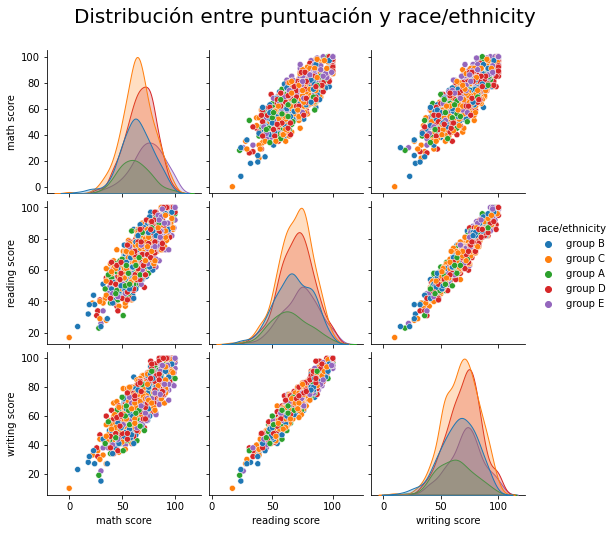

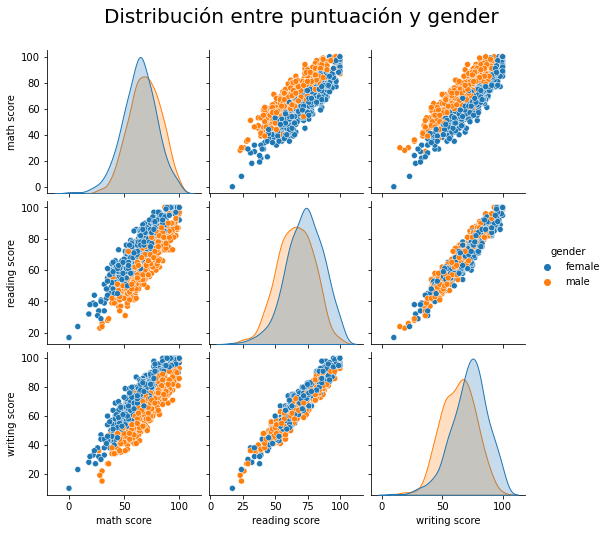

In [33]:
out1 = widgets.Output()
out2 = widgets.Output()
out3 = widgets.Output()
out4 = widgets.Output()


tab = widgets.Tab(children = [out1, out2])
tab.set_title(0, 'Gender')
tab.set_title(1, 'Race/Ethnicity')

display(tab)

with out1:
    dist(df, 'race/ethnicity')

with out2:
    dist(df, 'gender')

# 2. Verificar Distribución Normal

In [97]:
# Análisis gráfico distribución normal

h1 = df['math score'].to_numpy()
h2 = df['reading score'].to_numpy()
h3 = df['writing score'].to_numpy()

In [72]:
from scipy.stats import ks_2samp
ks_2samp(h1, h2)

KstestResult(statistic=0.104, pvalue=3.9587400002181794e-05)

In [116]:
data = df['math score']
dat = data[:145]
scipy.stats.kstest(dat,'norm')

KstestResult(statistic=0.9931034482758614, pvalue=7.99226125e-314)

In [112]:
def histplot(array1, array2, array3):
    
    hmean1 = np.mean(array1)
    hstd1 = np.std(array1)
    pdf1 = stats.norm.pdf(array1, hmean1, hstd1)
    hmean2 = np.mean(array2)
    hstd2 = np.std(array2)
    pdf2 = stats.norm.pdf(array2, hmean2, hstd2)
    hmean3 = np.mean(array3)
    hstd3 = np.std(array3)
    pdf3 = stats.norm.pdf(array3, hmean3, hstd3)
    
    g = plt.plot(array1, pdf1, array2, pdf2, array3, pdf3)
    
    return g

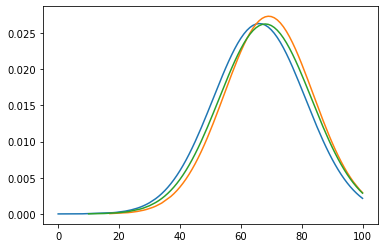

In [113]:
histplot(h1,h2,h3)

C:\Users\jda21\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\jda21\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


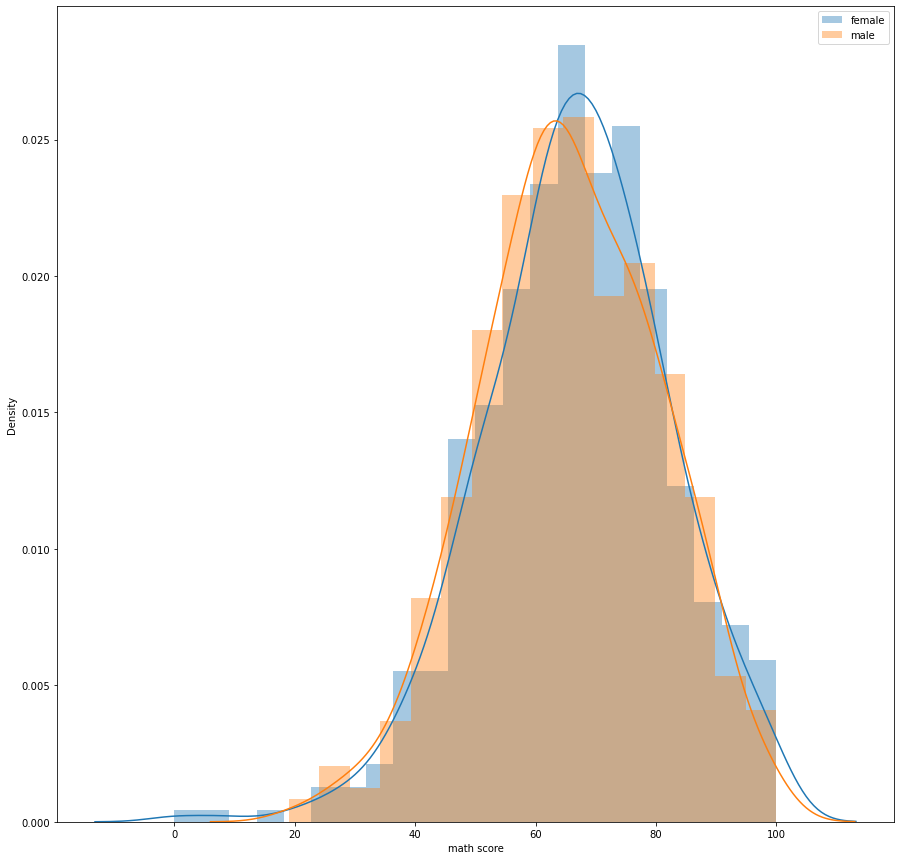

In [43]:
fig = plt.subplots(figsize=(15, 15))
female = df[df['gender']=='female']
male=df[df['gender']=='male']
sns.distplot(female["math score"],label="female")
sns.distplot(male["math score"],label="male")
plt.legend()
plt.show()

In [161]:
df['total_score'] = df['math_score'] + df['reading_score'] + df['writing_score']

# 3. Estimación del Modelo

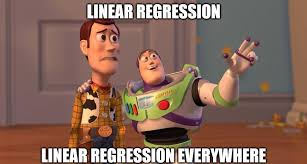

### 3.1. Cálculo del ANOVA

In [148]:
#Create anova test function
def anova(data, variable):
    
    x = ['math_score', 'reading_score', 'writing_score']
    for i,k in enumerate(x):
        lm = ols('{} ~ {}'.format(x[i],variable), data=data).fit()
        table = sm.stats.anova_lm(lm)
        print("P-value ANOVA relacionado entre {} & {} es ".format(x[i],variable),table.loc[variable,'PR(>F)'])

In [149]:
# ANOVA Test for lunch [ standard/free-reduced] variable
anova(df, 'lunch')

P-value ANOVA relacionado entre math_score & lunch es  2.4131955993147374e-30
P-value ANOVA relacionado entre reading_score & lunch es  2.0027966545288553e-13
P-value ANOVA relacionado entre writing_score & lunch es  3.1861895831680456e-15


In [150]:
# ANOVA Test for Gender [ male/female ] variable
anova(df, 'gender')

P-value ANOVA relacionado entre math_score & gender es  9.120185549333453e-08
P-value ANOVA relacionado entre reading_score & gender es  4.680538743935139e-15
P-value ANOVA relacionado entre writing_score & gender es  2.0198777068682407e-22


### 3.2. Determinación intercepto $\beta_0$

In [173]:
df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [205]:
from sklearn.linear_model import LinearRegression

x = df.iloc[:,5].values.reshape(-1,1)
y = df.iloc[:,6].values.reshape(-1,1)
lr = LinearRegression()
lr.fit(x,y)
y_pred = lr.predict(x)

In [206]:
reg = LinearRegression()
reg.fit(x,y)

print("LR model is: Y = {:.5}+{:.5}X".format(reg.intercept_[0],reg.coef_[0][0]))

LR model is: Y = 17.142+0.78723X


In [200]:
x = df['reading score']
y = df['math score']

x2 = sm.add_constant(x)
est = sm.OLS(y,x2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:             math score   R-squared:                       0.668
Model:                            OLS   Adj. R-squared:                  0.668
Method:                 Least Squares   F-statistic:                     2012.
Date:                Mon, 18 Jan 2021   Prob (F-statistic):          1.79e-241
Time:                        06:11:26   Log-Likelihood:                -3585.3
No. Observations:                1000   AIC:                             7175.
Df Residuals:                     998   BIC:                             7184.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             7.3576      1.338      5.498

### Intercepto $\beta_0 = 17.142$ 

### 3.3. Determinación pendiente $\beta_1$

In [208]:
model = LinearRegression()
model.fit(x, y)
model = LinearRegression().fit(x, y)
print('Slope B1:', model.coef_)

Slope B1: [[0.78722924]]


### Pendiente $\beta_1 = 0.7823$ 

# Modelo de Regresión:
### 3.4. Ecuación del modelo

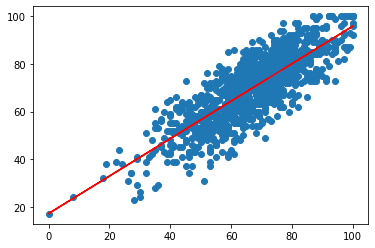

In [181]:
plt.scatter(x, y)
plt.plot(x, y_pred, color = 'red')
plt.show()

In [194]:
model = LinearRegression()
model.fit(x, y)
model = LinearRegression().fit(x, y)

r_sq = model.score(x, y)
print('R^2:', r_sq)
print('intercept Bo:', model.intercept_)
print('Slope B1:', model.coef_)

R^2: 0.6684365064501091
intercept Bo: [17.14180679]
Slope B1: [[0.78722924]]


In [209]:
reg = LinearRegression()
reg.fit(x,y)

print("LR model is: Y = {:.5}+{:.5}X".format(reg.intercept_[0],reg.coef_[0][0]))

LR model is: Y = 17.142+0.78723X


## Error asociado

In [218]:
from sklearn import metrics

main_cols = ['math score','reading score']
x = df[main_cols]
y = df['math score']

In [227]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [236]:
regressor = LinearRegression()
regressor.fit(x_train, y_train)

y_pred = regressor.predict(x_test)

In [239]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 2.2026824808563106e-15
Mean Squared Error: 1.539856486991415e-29
Root Mean Squared Error: 3.9241005173050996e-15
